In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import mlflow
from mlflow.models import infer_signature
import seaborn as sns
from sklearn.preprocessing import Normalizer
import dagshub

/Users/martinarnold/uva/venv/lib/python3.10/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/martinarnold/uva/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [ ]:
import lightgbm as lgb

# EDA Trees

In [2]:
df_tree_train = pd.read_csv("../data/covtype_train.csv")
df_tree_test = pd.read_csv("../data/covtype_test.csv")

## Distribution Cover_Type

In [3]:
df_tree_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58101 entries, 0 to 58100
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           58101 non-null  int64
 1   Aspect                              58101 non-null  int64
 2   Slope                               58101 non-null  int64
 3   Horizontal_Distance_To_Hydrology    58101 non-null  int64
 4   Vertical_Distance_To_Hydrology      58101 non-null  int64
 5   Horizontal_Distance_To_Roadways     58101 non-null  int64
 6   Hillshade_9am                       58101 non-null  int64
 7   Hillshade_Noon                      58101 non-null  int64
 8   Hillshade_3pm                       58101 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  58101 non-null  int64
 10  Wilderness_Area1                    58101 non-null  int64
 11  Wilderness_Area2                    58101 non-null  int64
 12  Wild

In [4]:
df_tree_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3351     206     27                               726   
1       2732     129      7                               212   
2       2572      24      9                               201   
3       2824      69     13                               417   
4       2529      84      5                               120   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             124                             3813   
1                               1                             1082   
2                              25                              957   
3                              39                             3223   
4                               9                             1092   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            192             252            180   
1            231             236            137   
2            216             222            142   
3            233             214            110   
4            227             231            139   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                2271  ...            0            0   
1                                 912  ...            0            0   
2                                2191  ...            0            0   
3                                6478  ...            0            0   
4                                4983  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            1   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           1  
1            0            0           2  
2            0            0           2  
3            0            0           2  
4            0            0           2  

[5 rows x 55 columns]

### Plotting non-categorical features

**With normalization**

In [5]:
tree = df_tree_train.iloc[:, 0:10].copy()

In [6]:
tree.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3351     206     27                               726   
1       2732     129      7                               212   
2       2572      24      9                               201   
3       2824      69     13                               417   
4       2529      84      5                               120   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             124                             3813   
1                               1                             1082   
2                              25                              957   
3                              39                             3223   
4                               9                             1092   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            192             252            180   
1            231             236            137   
2            216             222            142   
3            233             214            110   
4            227             231            139   

   Horizontal_Distance_To_Fire_Points  
0                                2271  
1                                 912  
2                                2191  
3                                6478  
4                                4983

In [7]:
tree_norm = Normalizer().fit_transform(tree.values)

In [8]:
tree_norm = pd.DataFrame(tree_norm, columns = tree.columns)

/Users/martinarnold/uva/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/martinarnold/uva/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/martinarnold/uva/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/martinarnold/uva/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

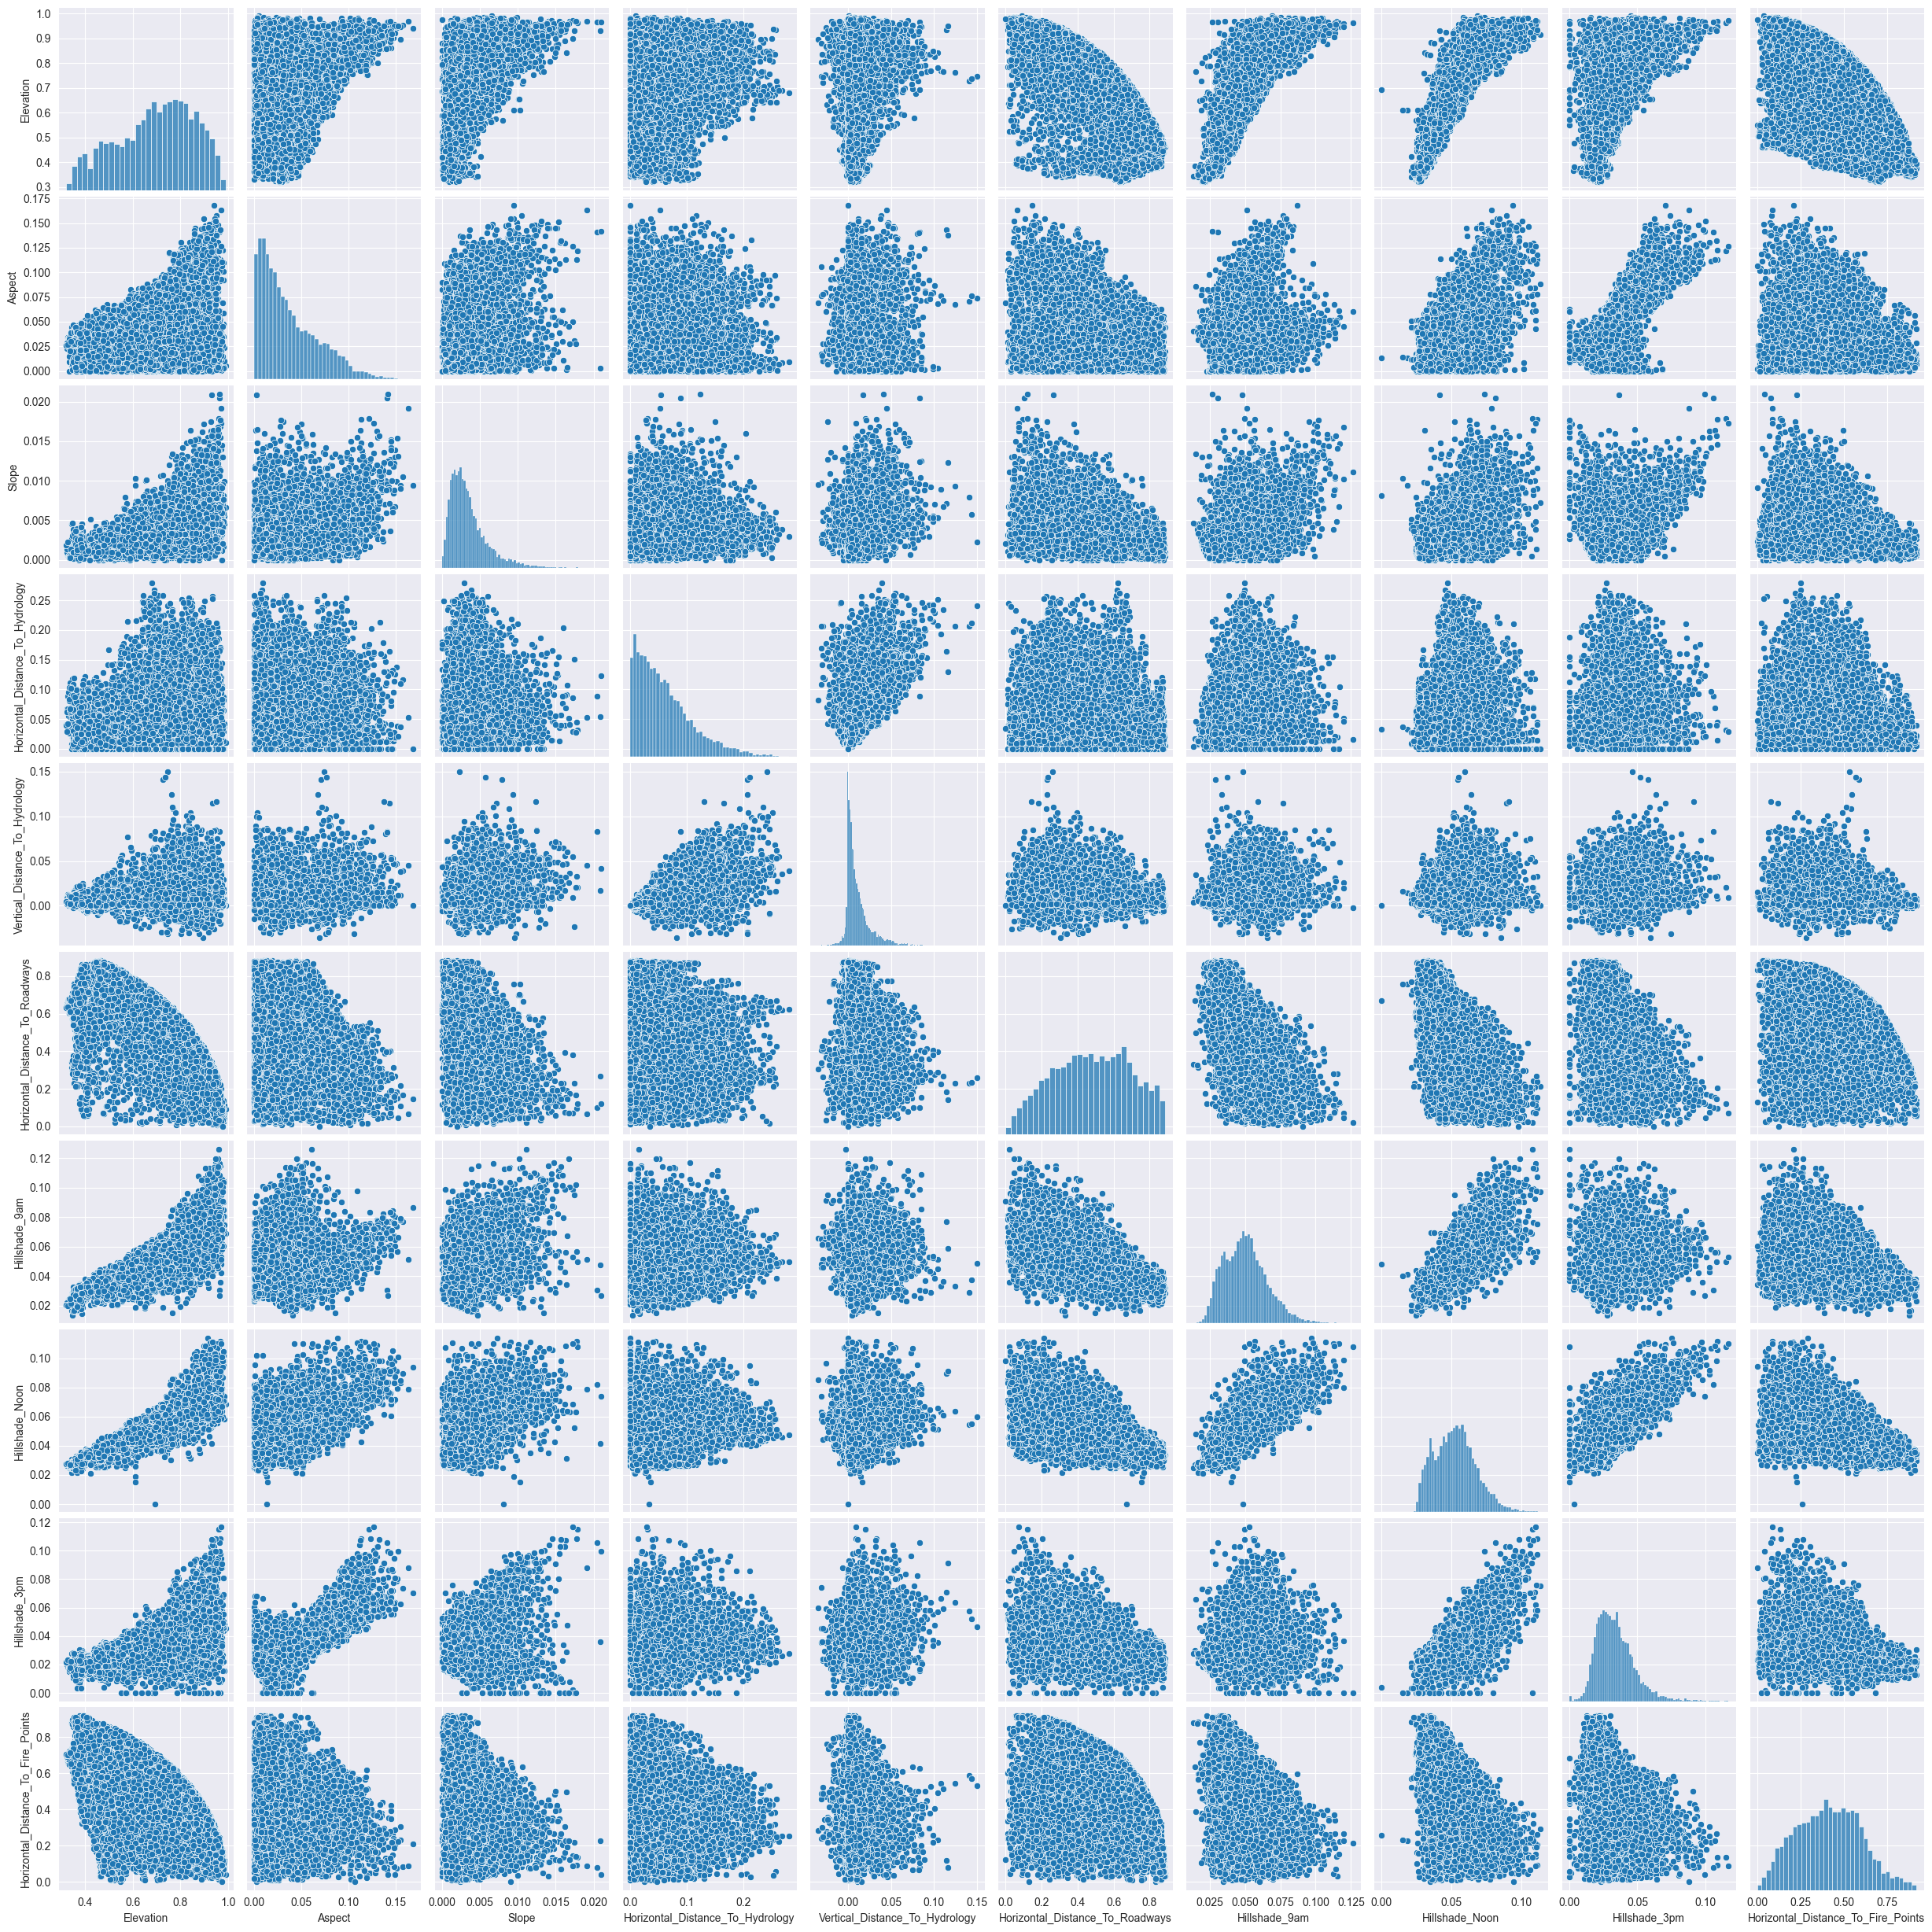

In [9]:
plot = tree_norm.sample(10000, random_state=42)
sns.pairplot(plot)

Looking at the plot, we can see the following: 

- none of the features is even closely normally distributed
- Elevation, Horizontal_Distance_To_Roadways, Hillshades, Horizontal_Distance_To_Fire_Points have a more or less un-skweded distribution
- Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology have a highly skewed distribution
- The scatter plots show alot of structure which implies dependence on the features on each other
- Some of them seem correlated: Hillshades x Hillshades, Elevation x Hillshades, Aspect x Hillshade, 

#### Labels

<BarContainer object of 7 artists>

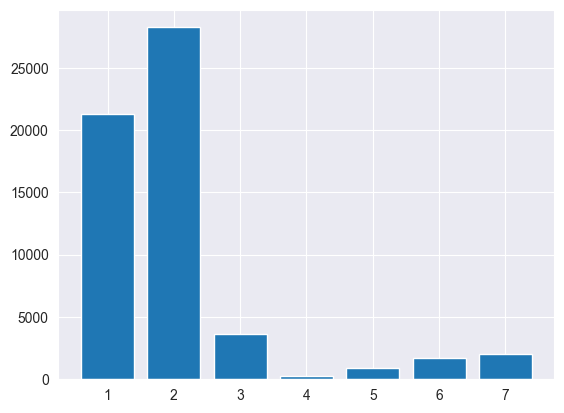

In [10]:
df_plot = df_tree_train.groupby("Cover_Type").agg(n = ("Cover_Type", "count")).reset_index()
plt.bar(df_plot['Cover_Type'], df_plot['n'])

We can see: 

- The labels are highly imbalanced

### Categorical features

**Wilderness type**

<BarContainer object of 4 artists>

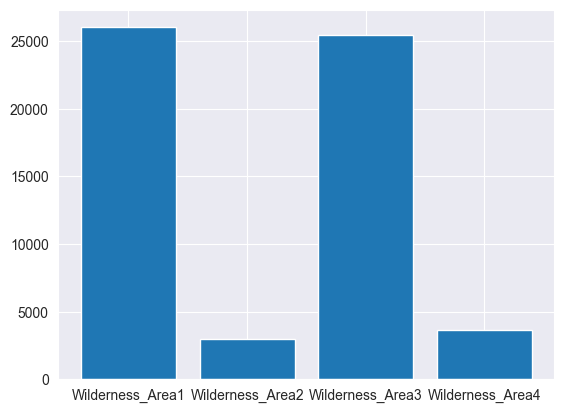

In [11]:
wilderness = df_tree_train[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].copy()
tree['wilderness_area'] = wilderness.idxmax(1)
df_plot = tree.groupby("wilderness_area").agg(n = ("wilderness_area", "count")).reset_index()
plt.bar(df_plot['wilderness_area'], df_plot['n'])

- Highly imbalanced feature

**Soil type**

<BarContainer object of 31 artists>

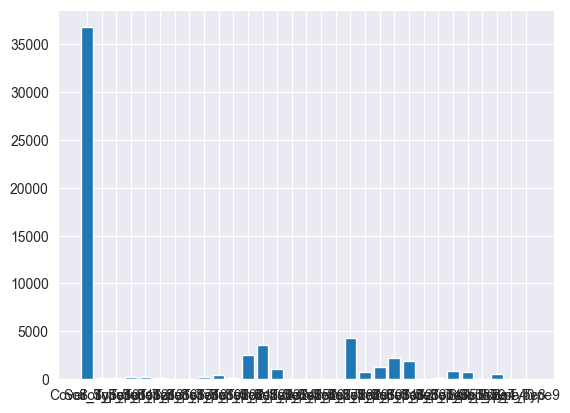

In [12]:
soil = df_tree_train.iloc[:, 14:55]
tree['soil_type'] = soil.idxmax(1)
df_plot = tree.groupby("soil_type").agg(n = ("soil_type", "count")).reset_index()
plt.bar(df_plot['soil_type'], df_plot['n'])

- soil type is highly imbalanced

### Summary

Main challenges:
- highly imbalanced data set: labels are imbalanced, categorical features imbalanced
- 10 non-categorical features vs. 2 categorical -> leading to 45 one-hot encoded cat. features  vs. 10 numerical
- numerical features skewed
- features depend on each other, e.g. hillshade correlated, slope x hillshade, etc.



In [ ]:
tree

In [ ]:
class TabPredictorComparer:
    tree_train = None
    heloc_train = None
    higgs_train = None
    
    datasets = ["tree", "heloc", "higgs"]
    
    scores = {} 
    
    def __init__(self):
        self.__load_data()
        
    
    def __load_data(self):
        self.tree_train = pd.read_csv("../data/covtype_train.csv")
        self.heloc_train = pd.read_csv("../data/heloc_train.csv")
        self.higgs_train = pd.read_csv("../data/higgs_train.csv")
        
        
    def get_scores(self, names, models, trained_on):
        for name, model in zip(names, models):
            scores = []
            X_train, X_test, y_train, y_test = self.__split_data(trained_on)
            pipeline = make_pipeline(model)
            pipeline.fit(X_train, y_train)
            score_trained_on = pipeline.score(X_test, y_test)
            scores.append({trained_on: score_trained_on})
            copy_list = self.datasets
            copy_list.remove(trained_on)
            for data in copy_list:
                X, y = self.__prepare_data(data)
                score = pipeline.score(X, y)
                scores.append({data: score})
            print(scores)


    def __split_data(self, trained_on):
        if trained_on == "tree":
            X, y = self.__prepare_data(trained_on)
            return train_test_split(X, y, test_size=0.2, random_state=42)
        if trained_on == "heloc":
            X, y = self.__prepare_data(trained_on)
            return train_test_split(X, y, test_size=0.2, random_state=42)            
        if trained_on == "higgs":
            X, y = self.__prepare_data(trained_on)
            return train_test_split(X, y, test_size=0.2, random_state=42)
        else:
            return None
        
        
    def __prepare_data(self, trained_on):
        if trained_on == "tree":
            X = self.tree_train.drop("Cover_Type", axis=1).values
            y = self.tree_train['Cover_Type'].values
            return X, y
        if trained_on == "heloc":
            X = self.heloc_train.drop("RiskPerformance", axis=1).values
            y = self.heloc_train['RiskPerformance'].values
            return X,y
        if trained_on == "higgs":
            X = self.higgs_train.drop("Label", axis=1).values
            y = self.higgs_train['Label'].values
            return X,y
        else:
            return None        
        


In [ ]:
comparer = TabPredictorComparer()

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

In [ ]:
comparer.get_scores(['test'],[model], "tree")

In [ ]:
comparer.higgs

In [ ]:
df_tree_train.head()

In [ ]:
df_tree_test.head()

In [ ]:
df_tree_train['Cover_Type'].unique()

In [6]:
dagshub.init("aml-final-project", "usermar445", mlflow=True)


Repository initialized!

In [4]:
from dagshub.data_engine import datasources
ds = datasources.create_datasource('usermar445/aml-final-project', 'covtype_train', 'data/covtype_train.csv')

In [30]:
X = df_tree_train.drop("Cover_Type", axis=1).values
y = df_tree_train['Cover_Type'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
params = {
    "n_estimators": 100,
    "max_depth": 5,
    "random_state": 0
}

In [28]:
model = RandomForestClassifier(**params)

In [ ]:
model = SVC(kernel="linear", C=0.025, random_state=42)

In [31]:
def get_accuracy(model, xtrain, ytrain, xtest, ytest): 
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(xtrain, ytrain)
    score = pipeline.score(xtest, ytest)
    return score

In [32]:
score = get_accuracy(model, X_train, y_train, X_test, y_test)

In [ ]:
score

In [ ]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [33]:

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", score)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForest classifier for tree")

    # Infer the model signature
    signature = infer_signature(X_train, model.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="tree_random_forest",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
Created version '3' of model 'tracking-quickstart'.


In [ ]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

iris_feature_names = df_tree_test.columns

result = pd.DataFrame(X_test, columns=iris_feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

result[:4]

In [ ]:
df_heloc = pd.read_csv("../data/heloc_train.csv")

In [ ]:
df_heloc.head()

In [ ]:
X = df_heloc.drop("RiskPerformance", axis=1).values
y = df_heloc['RiskPerformance'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
get_accuracy(model, X_train, y_train, X_test, y_test)

In [2]:
import os
from dagshub.data_engine import datasources


In [25]:
DAGSHUB_TOKEN = dagshub.auth.get_token()
DAGSHUB_USER = "usermar445"
DAGSHUB_REPO = "aml-final-project"
DATASOURCE_PATH = "/data"
DAGSHUB_FULL_REPO = DAGSHUB_USER + "/" + DAGSHUB_REPO

MLFLOW_TRACKING_URI = f"https://dagshub.com/{DAGSHUB_USER}/{DAGSHUB_REPO}.mlflow"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
os.environ["MLFLOW_TRACKING_USERNAME"] = DAGSHUB_USER
os.environ["MLFLOW_TRACKING_PASSWORD"] = DAGSHUB_TOKEN

In [24]:
ds = datasources.get_datasource(repo=DAGSHUB_FULL_REPO, name="data/covtype_train.csv")


DatasourceNotFoundError: Datasource with name data/covtype_train.csv or id None not found in repository usermar445/aml-final-project

In [5]:
res = ds.all()

Output()

In [18]:
ds.head().dataframe

DatasourceNotFoundError: Datasource with name covtype_train or id 911 not found in repository usermar445/aml-final-project

In [25]:
ds['elevation']>3000

FieldNotFoundError: Field elevation does not exist on this datasource

In [ ]:
df_tree['Cover_Type'].unique()

In [ ]:
df_heloc['RiskPerformance'].unique()

In [9]:
df_higgs = pd.read_csv(ds)

ValueError: Invalid file path or buffer object type: <class 'dagshub.data_engine.model.datasource.Datasource'>

In [16]:
from dagshub.upload import Repo

repo = Repo("usermar445", "aml-final-project")  # Optional: username, password, token, branch

# Upload a single file to a repository in one line
repo.upload(local_path="../data/covtype_test.csv", remote_path="data/raw/covtype_test.csv",
            commit_message="Added Raw Data",versioning="dvc")

Uploading files (1) to "usermar445/aml-final-project"...

Upload finished successfully!

In [17]:
repo.upload(local_path="../data/covtype_train.csv", remote_path="data/raw/covtype_train.csv",
            commit_message="Covtype train data",versioning="dvc")

Uploading files (1) to "usermar445/aml-final-project"...

Upload finished successfully!

In [ ]:
df_higgs["Label"].unique()